#### 1.Read the dataset and clean it by dropping unwanted columns and null values.2.Visuatization of Data by Using Various datavisualization Techinques3.Finding the popular products of dataset based on ratings and userscount.These products are recommended to new customers.4.Finding utility matrix by different columns and Decomposing the matrix by Svd.5.Training The dataset and Predicting the Test Dataset against the trainset using Different models like k-fold ,Svd and k-means.6.Finding Bias using over dataset using Rmse,Mse and different Data visualization Techinques.

In [2]:
import pandas as pd


In [6]:
df=pd.read_csv("electronics.csv")
df

item_id  user_id  rating   timestamp model_attr  \
0              0        0     5.0  1999-06-13     Female   
1              0        1     5.0  1999-06-14     Female   
2              0        2     3.0  1999-06-17     Female   
3              0        3     1.0  1999-07-01     Female   
4              0        4     2.0  1999-07-06     Female   
...          ...      ...     ...         ...        ...   
1292949     9478  1157628     1.0  2018-09-26     Female   
1292950     9435  1157629     5.0  2018-09-26     Female   
1292951     9305  1157630     3.0  2018-09-26     Female   
1292952     9303  1157631     5.0  2018-09-29       Male   
1292953     9478  1157632     1.0  2018-10-01     Female   

                        category       brand  year user_attr  split  
0         Portable Audio & Video         NaN  1999       NaN      0  
1         Portable Audio & Video         NaN  1999       NaN      0  
2         Portable Audio & Video         NaN  1999       NaN      0  
3         Portable Audio & Video         NaN  1999       NaN      0  
4         Portable Audio & Video         NaN  1999       NaN      0  
...                          ...         ...   ...       ...    ...  
1292949               Headphones  Etre Jeune  2017       NaN      0  
1292950  Computers & Accessories         NaN  2017       NaN      0  
1292951  Computers & Accessories         NaN  2016       NaN      0  
1292952               Headphones         NaN  2018       NaN      0  
1292953               Headphones  Etre Jeune  2017    Female      0  

[1292954 rows x 10 columns]

In [7]:
df.shape

(1292954, 10)

In [8]:
df.columns

Index(['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category',
       'brand', 'year', 'user_attr', 'split'],
      dtype='object')

In [9]:
df.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand          961834
year                0
user_attr     1118830
split               0
dtype: int64

In [10]:
df=df.drop(columns=["user_attr","brand","split","timestamp","model_attr"])
df


item_id  user_id  rating                 category  year
0              0        0     5.0   Portable Audio & Video  1999
1              0        1     5.0   Portable Audio & Video  1999
2              0        2     3.0   Portable Audio & Video  1999
3              0        3     1.0   Portable Audio & Video  1999
4              0        4     2.0   Portable Audio & Video  1999
...          ...      ...     ...                      ...   ...
1292949     9478  1157628     1.0               Headphones  2017
1292950     9435  1157629     5.0  Computers & Accessories  2017
1292951     9305  1157630     3.0  Computers & Accessories  2016
1292952     9303  1157631     5.0               Headphones  2018
1292953     9478  1157632     1.0               Headphones  2017

[1292954 rows x 5 columns]

In [11]:
df.isnull().sum()

item_id     0
user_id     0
rating      0
category    0
year        0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   item_id   1292954 non-null  int64  
 1   user_id   1292954 non-null  int64  
 2   rating    1292954 non-null  float64
 3   category  1292954 non-null  object 
 4   year      1292954 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 49.3+ MB


In [13]:
popular_items = pd.DataFrame(df.groupby('item_id')['rating'].count())
most_popular = popular_items.sort_values('rating', ascending=False)
most_popular.head(10)

rating
item_id        
7780      28530
2031       9393
1575       8622
2279       6278
2486       5810
2340       5790
5795       5554
1715       5482
1124       5353
1886       5323

##### Bargraph Visualization

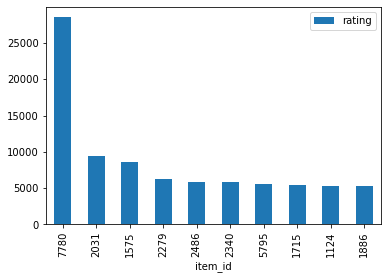

In [14]:
most_popular.head(10).plot(kind="bar")

In [15]:
popular_items = pd.DataFrame(df.groupby('category')['rating'].count())
most_popular = popular_items.sort_values('rating', ascending=False)
most_popular.head(10)

rating
category                       
Headphones               359334
Computers & Accessories  322938
Camera & Photo           192573
Accessories & Supplies   158598
Portable Audio & Video   143370
Car Electronics & GPS     33070
Television & Video        32057
Home Audio                24193
Wearable Technology       16015
Security & Surveillance   10806

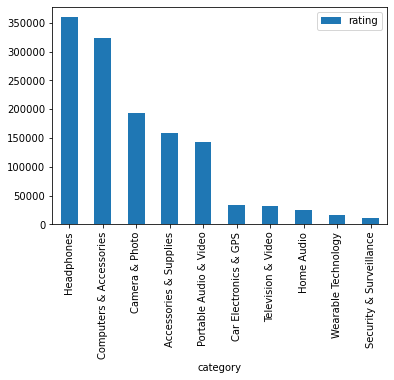

In [16]:
most_popular.plot(kind="bar")

In [17]:
df['category'].value_counts()

Headphones                 359334
Computers & Accessories    322938
Camera & Photo             192573
Accessories & Supplies     158598
Portable Audio & Video     143370
Car Electronics & GPS       33070
Television & Video          32057
Home Audio                  24193
Wearable Technology         16015
Security & Surveillance     10806
Name: category, dtype: int64

In [18]:
df['rating'].value_counts()

5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0     78648
Name: rating, dtype: int64

In [19]:
import numpy as np

In [20]:
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users :", len(np.unique(df.user_id)))
print("Total No of products :", len(np.unique(df.item_id)))


Total no of ratings : 1292954
Total No of Users : 1157633
Total No of products : 9560


In [21]:
Data_new_grouped =df.groupby('item_id').agg({'category': 'count'}).reset_index()
Data_new_grouped.rename(columns = {'category': 'score'},inplace=True) #rename:changes category as score
Data_new_grouped.head()

item_id  score
0        0    118
1        1     58
2        2   3404
3        3    155
4        4     11

In [22]:
train_data_sort = Data_new_grouped.sort_values(['score', 'item_id'], ascending = [0,1])
train_data_sort

item_id  score
7780     7780  28530
2031     2031   9393
1575     1575   8622
2279     2279   6278
2486     2486   5810
...       ...    ...
4253     4253      1
7810     7810      1
9555     9555      1
9557     9557      1
9559     9559      1

[9560 rows x 2 columns]

In [23]:
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')

##### Top 5 recommendations

In [24]:
popularity_recommendations = train_data_sort.head(5)
popularity_recommendations

item_id  score  Rank
7780     7780  28530   1.0
2031     2031   9393   2.0
1575     1575   8622   3.0
2279     2279   6278   4.0
2486     2486   5810   5.0

###### Recomendations based on user id

In [29]:
def recommend(index):
    user_recommendations = popularity_recommendations
    #Add user_id column for which the recommendations are being generated
    user_recommendations['index'] = index
    #Bring user_id column to the front
    cols = user_recommendations.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    user_recommendations = user_recommendations[cols]
    return user_recommendations
find_recom = [1005] # This list is user choice.It recommend items on considering index as id.
for i in find_recom:
    print("Here is the recommendation for the category: %d\n" %(i))
    print(recommend(i))
    print("\n")


Here is the recommendation for the category: 1005

      index  item_id  score  Rank
7780   1005     7780  28530   1.0
2031   1005     2031   9393   2.0
1575   1005     1575   8622   3.0
2279   1005     2279   6278   4.0
2486   1005     2486   5810   5.0




<ipython-input-29-c62d0b3bcf81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_recommendations['index'] = index


##### SOME VISUALIZATIONS TO ESTIMATE BIAS

###### Boxplot Visualization

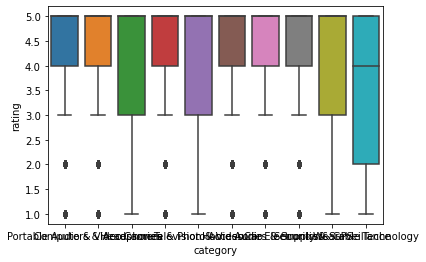

In [32]:
import seaborn as sns
sns.boxplot(x=df['category'],y = df['rating'])

In [33]:
df=pd.read_csv("modcloth.csv")
df

item_id       user_id  rating                         timestamp  size  \
0         7443          Alex       4         2010-01-21 08:00:00+00:00   NaN   
1         7443  carolyn.agan       3         2010-01-27 08:00:00+00:00   NaN   
2         7443         Robyn       4         2010-01-29 08:00:00+00:00   NaN   
3         7443            De       4         2010-02-13 08:00:00+00:00   NaN   
4         7443         tasha       4         2010-02-18 08:00:00+00:00   NaN   
...        ...           ...     ...                               ...   ...   
99888   154797     BernMarie       5  2019-06-26 21:15:13.165000+00:00   6.0   
99889    77949           Sam       4  2019-06-26 23:22:29.633000+00:00   4.0   
99890    67194        Janice       5  2019-06-27 00:20:52.125000+00:00   NaN   
99891    71607           amy       3  2019-06-27 15:45:06.250000+00:00   NaN   
99892   119732         sarah       3  2019-06-29 13:55:16.542000+00:00   NaN   

                  fit user_attr   model_attr   category              brand  \
0                 NaN     Small        Small    Dresses                NaN   
1                 NaN       NaN        Small    Dresses                NaN   
2                 NaN     Small        Small    Dresses                NaN   
3                 NaN       NaN        Small    Dresses                NaN   
4                 NaN     Small        Small    Dresses                NaN   
...               ...       ...          ...        ...                ...   
99888      Just right     Large  Small&Large    Dresses                NaN   
99889  Slightly small     Small  Small&Large    Bottoms                NaN   
99890      Just right     Small  Small&Large    Dresses                NaN   
99891  Slightly small     Small  Small&Large  Outerwear  Jack by BB Dakota   
99892      Just right     Small        Small    Dresses                NaN   

       year  split  
0      2012      0  
1      2012      0  
2      2012      0  
3      2012      0  
4      2012      0  
...     ...    ...  
99888  2017      0  
99889  2014      2  
99890  2013      2  
99891  2016      2  
99892  2016      2  

[99893 rows x 12 columns]

In [34]:
df.shape

(99893, 12)

In [35]:
df.isnull().sum()

item_id           0
user_id           1
rating            0
timestamp         0
size          21760
fit           18506
user_attr      8367
model_attr        0
category          0
brand         73980
year              0
split             0
dtype: int64

In [36]:
print(df.columns)

Index(['item_id', 'user_id', 'rating', 'timestamp', 'size', 'fit', 'user_attr',
       'model_attr', 'category', 'brand', 'year', 'split'],
      dtype='object')


In [37]:
df=df.drop(columns=['timestamp','size', 'fit', 'user_attr', 'brand', 'split'])
print(df)

       item_id       user_id  rating   model_attr   category  year
0         7443          Alex       4        Small    Dresses  2012
1         7443  carolyn.agan       3        Small    Dresses  2012
2         7443         Robyn       4        Small    Dresses  2012
3         7443            De       4        Small    Dresses  2012
4         7443         tasha       4        Small    Dresses  2012
...        ...           ...     ...          ...        ...   ...
99888   154797     BernMarie       5  Small&Large    Dresses  2017
99889    77949           Sam       4  Small&Large    Bottoms  2014
99890    67194        Janice       5  Small&Large    Dresses  2013
99891    71607           amy       3  Small&Large  Outerwear  2016
99892   119732         sarah       3        Small    Dresses  2016

[99893 rows x 6 columns]


In [38]:
df.isnull().sum()

item_id       0
user_id       1
rating        0
model_attr    0
category      0
year          0
dtype: int64

In [39]:
df.dropna(inplace=True)
print(df.isnull().sum())

item_id       0
user_id       0
rating        0
model_attr    0
category      0
year          0
dtype: int64


In [40]:
df.shape #after cleaning the data

(99892, 6)

In [41]:
df.loc[:,"year"]

0        2012
1        2012
2        2012
3        2012
4        2012
         ... 
99888    2017
99889    2014
99890    2013
99891    2016
99892    2016
Name: year, Length: 99892, dtype: int64

In [42]:
print(df.sort_values(by="year",ascending=False))

       item_id              user_id  rating   model_attr   category  year
56024   128563  deanna.lauren.dixon       5  Small&Large    Dresses  2019
94508   153517                 dawn       5  Small&Large       Tops  2019
94566   152915                  kay       2        Small       Tops  2019
65762   135345       francescaviola       4  Small&Large    Dresses  2019
87000   153081                adkay       5        Small    Dresses  2019
...        ...                  ...     ...          ...        ...   ...
12015    11960                 Lena       5  Small&Large  Outerwear  2010
24173    11960               ALICIA       4  Small&Large  Outerwear  2010
43813    11960           twodollerz       4  Small&Large  Outerwear  2010
39195    11960             r.g_7557       1  Small&Large  Outerwear  2010
9996     11960               lydier       3  Small&Large  Outerwear  2010

[99892 rows x 6 columns]


In [43]:
df.corr()

item_id    rating      year
item_id  1.000000 -0.016544  0.679161
rating  -0.016544  1.000000 -0.005686
year     0.679161 -0.005686  1.000000

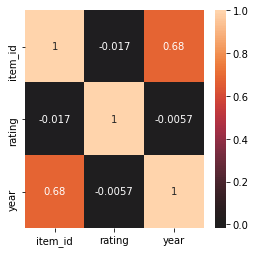

In [44]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,4))
sns.heatmap(df.corr(),center=0,annot=True)
plt.show()

In [45]:
df['year'].value_counts() #sales on particular year

2016    18369
2015    17381
2018    16229
2013    14277
2017    12910
2014    12017
2019     3483
2012     3112
2011     1260
2010      854
Name: year, dtype: int64

In [46]:
df['category'].value_counts()

Tops         34977
Dresses      34160
Bottoms      23624
Outerwear     7131
Name: category, dtype: int64

In [47]:
df['rating'].value_counts()

5    54568
4    24591
3    11359
2     5851
1     3523
Name: rating, dtype: int64

###### Arranging categories according to ratings in an order

##### If user is new we can recommend products based on the top ratings,latest sale on recent years and on suggesting trend of particular product as shown below.

In [48]:
popular_products = pd.DataFrame(df.groupby('category')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular

rating
category         
Tops        34977
Dresses     34160
Bottoms     23624
Outerwear    7131

### Bargraph Visualization

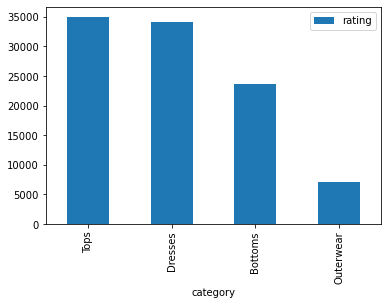

In [49]:
most_popular.plot(kind = "bar")

In [50]:
popular_products = pd.DataFrame(df.groupby('category')['rating'].mean())
popular_products['rating_counts']= pd.DataFrame(df.groupby('category')['rating'].count())
popular_products.head()

rating  rating_counts
category                          
Bottoms    4.185278          23624
Dresses    4.230562          34160
Outerwear  4.217361           7131
Tops       4.203991          34977

In [51]:
popular_products.sort_values('rating_counts',ascending=False).head()

rating  rating_counts
category                          
Tops       4.203991          34977
Dresses    4.230562          34160
Bottoms    4.185278          23624
Outerwear  4.217361           7131

In [52]:
popular_items = pd.DataFrame(df.groupby('item_id')['rating'].count())
most_popular = popular_items.sort_values('rating', ascending=False)
most_popular.head(10)

rating
item_id        
34935      1887
21296      1636
32405      1599
32406      1494
32403      1378
67507      1357
16411      1260
55967      1164
57369      1133
82288      1105

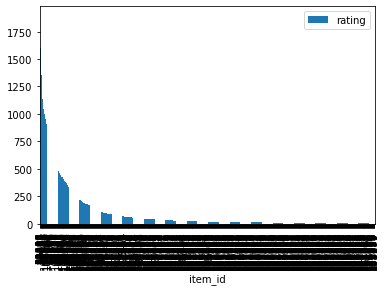

In [53]:
most_popular.plot(kind = "bar")

In [54]:
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users :", len(np.unique(df.user_id)))
print("Total No of products :", len(np.unique(df.item_id)))


Total no of ratings : 99892
Total No of Users : 44783
Total No of products : 1020


In [55]:
ratings_utility_matrix = df.pivot_table(values='rating', index='user_id', columns='item_id', fill_value=0)
ratings_utility_matrix.head()

item_id     6454    7443    11960   16411   21296   22563   24853   27439   \
user_id                                                                      
"Ferrari")       0       0       0       0       0       0       0       0   
#                0       0       0       0       0       0       0       0   
#1dad            0       0       0       0       0       0       0       0   
'Chelle          0       0       0       0       0       0       0       0   
'Tree'           0       0       0       0       0       0       0       0   

item_id     27590   28252   ...  155090  155165  155293  155305  155307  \
user_id                     ...                                           
"Ferrari")       0       0  ...       0       0       0       0       0   
#                0       0  ...       0       0       0       0       0   
#1dad            0       0  ...       0       0       0       0       0   
'Chelle          0       0  ...       0       0       0       0       0   
'Tree'           0       0  ...       0       0       0       0       0   

item_id     155308  155317  155537  155597  155950  
user_id                                             
"Ferrari")       0       0       0       0       0  
#                0       0       0       0       0  
#1dad            0       0       0       0       0  
'Chelle          0       0       0       0       0  
'Tree'           0       0       0       0       0  

[5 rows x 1020 columns]

In [56]:
ratings_utility_matrix.shape

(44783, 1020)

In [57]:
# transpose
X=ratings_utility_matrix.T
X.head()

user_id  "Ferrari")  #  #1dad  'Chelle  'Tree'  (usually)  -L  .  ..  00erin  \
item_id                                                                        
6454              0  0      0        0       0          0   0  0   0       0   
7443              0  0      0        0       0          0   0  0   0       0   
11960             0  0      0        0       0          0   0  0   0       0   
16411             0  0      0        0       0          0   0  0   0       0   
21296             0  0      0        0       0          0   0  0   0       0   

user_id  ...  zuel  zugai01  zulemaphone  zumbafitnesscarly  zumbaneko  \
item_id  ...                                                             
6454     ...     0        0            0                  0          0   
7443     ...     0        0            0                  0          0   
11960    ...     0        0            0                  0          0   
16411    ...     0        0            0                  0          0   
21296    ...     0        0            0                  0          0   

user_id  zurajohnson  zuzu_zoom  🇦🇺  🐻  😊  
item_id                                    
6454               0          0   0  0  0  
7443               0          0   0  0  0  
11960              0          0   0  0  0  
16411              0          0   0  0  0  
21296              0          0   0  0  0  

[5 rows x 44783 columns]

In [58]:
Data_new_grouped =df.groupby('item_id').agg({'user_id': 'count'}).reset_index()
Data_new_grouped.rename(columns = {'user_id': 'score'},inplace=True) #rename:changes user_id as score
Data_new_grouped.head()

item_id  score
0     6454     66
1     7443   1011
2    11960    854
3    16411   1260
4    21296   1636

In [59]:
train_data_sort = Data_new_grouped.sort_values(['score', 'item_id'], ascending = [0,1])
train_data_sort

item_id  score
19     34935   1887
4      21296   1636
16     32405   1599
17     32406   1494
15     32403   1378
..       ...    ...
583   152576      1
616   152835      1
716   153228      1
746   153339      1
816   153479      1

[1020 rows x 2 columns]

In [60]:
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')

##### Top 5 recommendations

In [61]:
popularity_recommendations = train_data_sort.head(5)
popularity_recommendations

item_id  score  Rank
19    34935   1887   1.0
4     21296   1636   2.0
16    32405   1599   3.0
17    32406   1494   4.0
15    32403   1378   5.0

#### Recommendations Based on user_id

In [62]:
def recommend(user_id):
    user_recommendations = popularity_recommendations
    #Add user_id column for which the recommendations are being generated
    user_recommendations['user_id'] = user_id
    #Bring user_id column to the front
    cols = user_recommendations.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    user_recommendations = user_recommendations[cols]
    return user_recommendations
find_recom = [15] # This list is user choice.It recommend items on considering index as id.
for i in find_recom:
    print("Here is the recommendation for the user_id: %d\n" %(i))
    print(recommend(i))
    print("\n")

Here is the recommendation for the user_id: 15

    user_id  item_id  score  Rank
19       15    34935   1887   1.0
4        15    21296   1636   2.0
16       15    32405   1599   3.0
17       15    32406   1494   4.0
15       15    32403   1378   5.0




<ipython-input-62-8c73a8a42038>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_recommendations['user_id'] = user_id


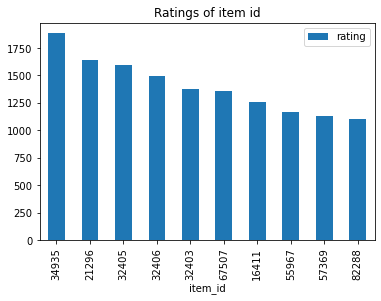

In [63]:
# Top 10 recommendations for the users
popular_products = pd.DataFrame(df.groupby('item_id')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(10).plot(kind = "bar")
plt.title("Ratings of item id")
plt.show()

In [69]:
X.shape
(1020,44783)

(1020, 44783)

In [67]:
X1=X #Unique products in subset of data

In [70]:
import sklearn
from sklearn.decomposition import TruncatedSVD #svd for dimensionality reduction and Decomposing the Matri
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape
(1020, 10)
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape
(1020, 1020)
correlation_item_id = correlation_matrix[1010]
Recommend = list(X.index[correlation_item_id > 0.90]) #It recommend items in given range son satisfying giv
Recommend[0:5]
[32406, 153543, 155090]

[32406, 153543, 155090]

In [71]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Shiva' is not recognized as an internal or external command,
operable program or batch file.


In [72]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split
from collections import defaultdict
counts1 = df['user_id'].value_counts() #print(counts1)
Data_new = df[df['user_id'].isin(counts1[counts1 >= 50].index)]
reader = Reader(rating_scale=(1,5)) 3Reading the data
data = Dataset.load_from_df(Data_new[['user_id', 'item_id', 'rating']], reader)
data

SyntaxError: invalid syntax (<ipython-input-72-248bb979d832>, line 10)

##### Evaluation of model using k fold cross validation

In [ ]:
from surprise import SVD
from surprise.model_selection import cross_validate
svd = SVD(verbose=True, n_epochs=10)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

##### SOME VISUALIZATIONS TO ESTIMATE BIAS

##### PAIRPLOT:To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function.

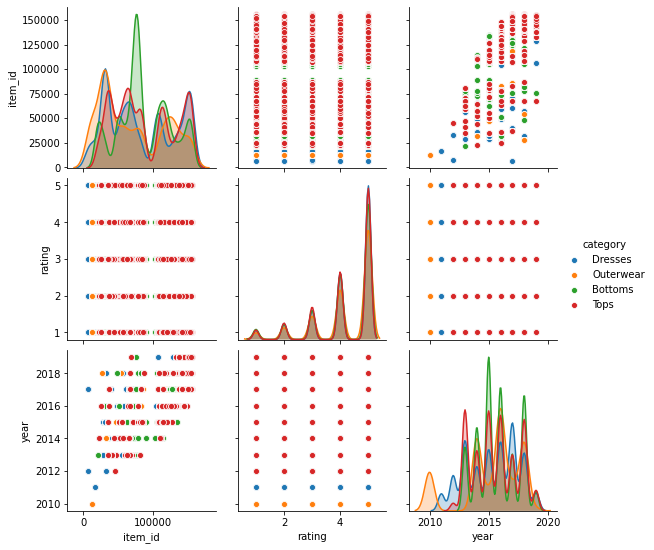

In [73]:
import seaborn as sns
sns.pairplot(df,hue="category",kind="scatter")
plt.show()

##### BOXPLOT

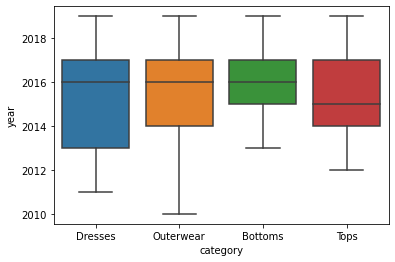

In [74]:
sns.boxplot(x=df['category'],y = df['year'])